In [10]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("1976-2020-senate.csv")

In [12]:
df
df_mod = df[df['stage'] == 'gen']
df_mod = df_mod[df_mod['party_simplified'].isin(['REPUBLICAN', 'DEMOCRAT'])]
grouped = df_mod.groupby(['year', 'party_simplified'])['candidatevotes'].sum().unstack().fillna(0)
grouped['Total'] = grouped.sum(axis=1)
grouped['DEMOCRAT_pct'] = 100 * grouped['DEMOCRAT'] / grouped['Total']
grouped['REPUBLICAN_pct'] = 100 * grouped['REPUBLICAN'] / grouped['Total']

In [13]:
dem_votes = grouped['DEMOCRAT_pct']

# Fit ARIMA model (p=1, d=1, q=1 as example)
model = ARIMA(dem_votes, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.predict(start=0, end=len(dem_votes)-1, typ='levels')

C:\Users\alanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

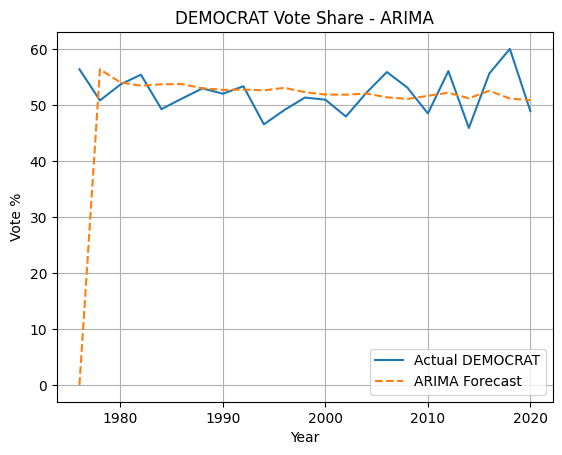

In [14]:
plt.plot(dem_votes.index, dem_votes, label='Actual DEMOCRAT')
plt.plot(dem_votes.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.legend()
plt.title("DEMOCRAT Vote Share - ARIMA")
plt.xlabel("Year")
plt.ylabel("Vote %")
plt.grid(True)
plt.show()